# Part 1


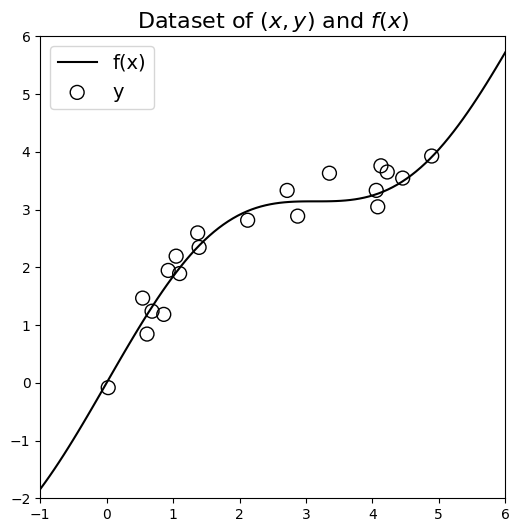

In [70]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100) # So we get the same results each time
LEGEND_FONTSIZE = 14
TITLE_FONTSIZE = 16
NOISE_STD = .3
N_OBSERVATIONS = 20
DATA_COLOR = 'black'
MARKER_SIZE = 100
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen', 'violet']
ERROR_COLOR = 'darkred'

# We define tha values of x on the x-axis
x_values = np.random.rand(N_OBSERVATIONS) * 5

x_grid = x_grid = np.linspace(-1, 6, 100)


def f(x):
  # The basic function

  return np.sin(x) + x

# The value observed of y
def y (x, noise = NOISE_STD):
  epsilon = np.random.normal(loc = 0, scale = noise, size = x.shape)
  return f(x) + epsilon

def plot_dataset_f(y):
  # Plot both the function f and the values of the observed
  fix, axs = plt.subplots(figsize = (6,6))
  plt.plot(x_grid, f(x_grid), color = DATA_COLOR, label = 'f(x)')
  plt.scatter(x_values, y, s= MARKER_SIZE, edgecolor = DATA_COLOR, facecolors = 'None', label = 'y')

# Generate the observed y values
y_values = y(x_values)
plot_dataset_f(y_values) # Plot the dataset of (x,y) and (x,f(x))
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.title(f'Dataset of $(x,y)$ and $f(x)$', fontsize=16)
plt.xlim([-1, 6])
plt.ylim([-2, 6])
plt.show()


# Part 2

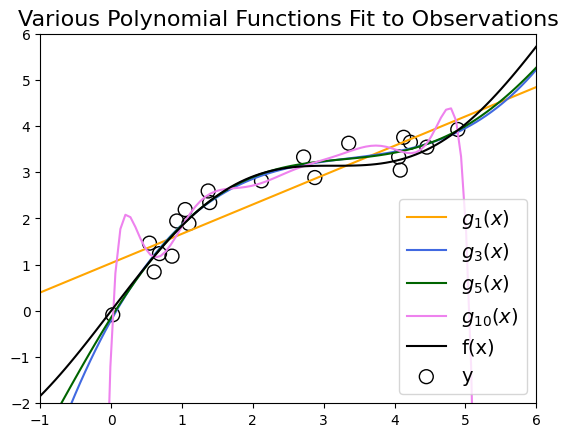

In [71]:
polynomial_degrees = [1,3,5,10]
beta = {} # Dictionary so that for each degree we keep track of the parameters estimated
fit = {} # Dictionary to calculate the y value given a polynomial with certain parameters

for ii, degree in enumerate(polynomial_degrees):
  beta[degree] = np.polyfit(x_values,y_values,degree) # Estimating the parameters for these lines
  fit[degree] = np.polyval(beta[degree], x_grid) # Generate the y values for the polynomial
  plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label = f"$g_{{{polynomial_degrees[ii]}}}(x)$")

# Perform the plotting of y and f
plt.plot(x_grid, f(x_grid), color = DATA_COLOR, label = 'f(x)')
plt.scatter(x_values, y_values, s= MARKER_SIZE, edgecolor = DATA_COLOR, facecolors = 'None', label = 'y')

plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 6])
plt.ylim([-2, 6])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTSIZE)
plt.show()


**Remarks**

1 We observe that the estimator with degree 1 is undefitting as we have a straight line and a big estimator bias

2 We observe that the estimator with degree 10 is overfitting as it has a big estimator variance

# Part 3 (a)


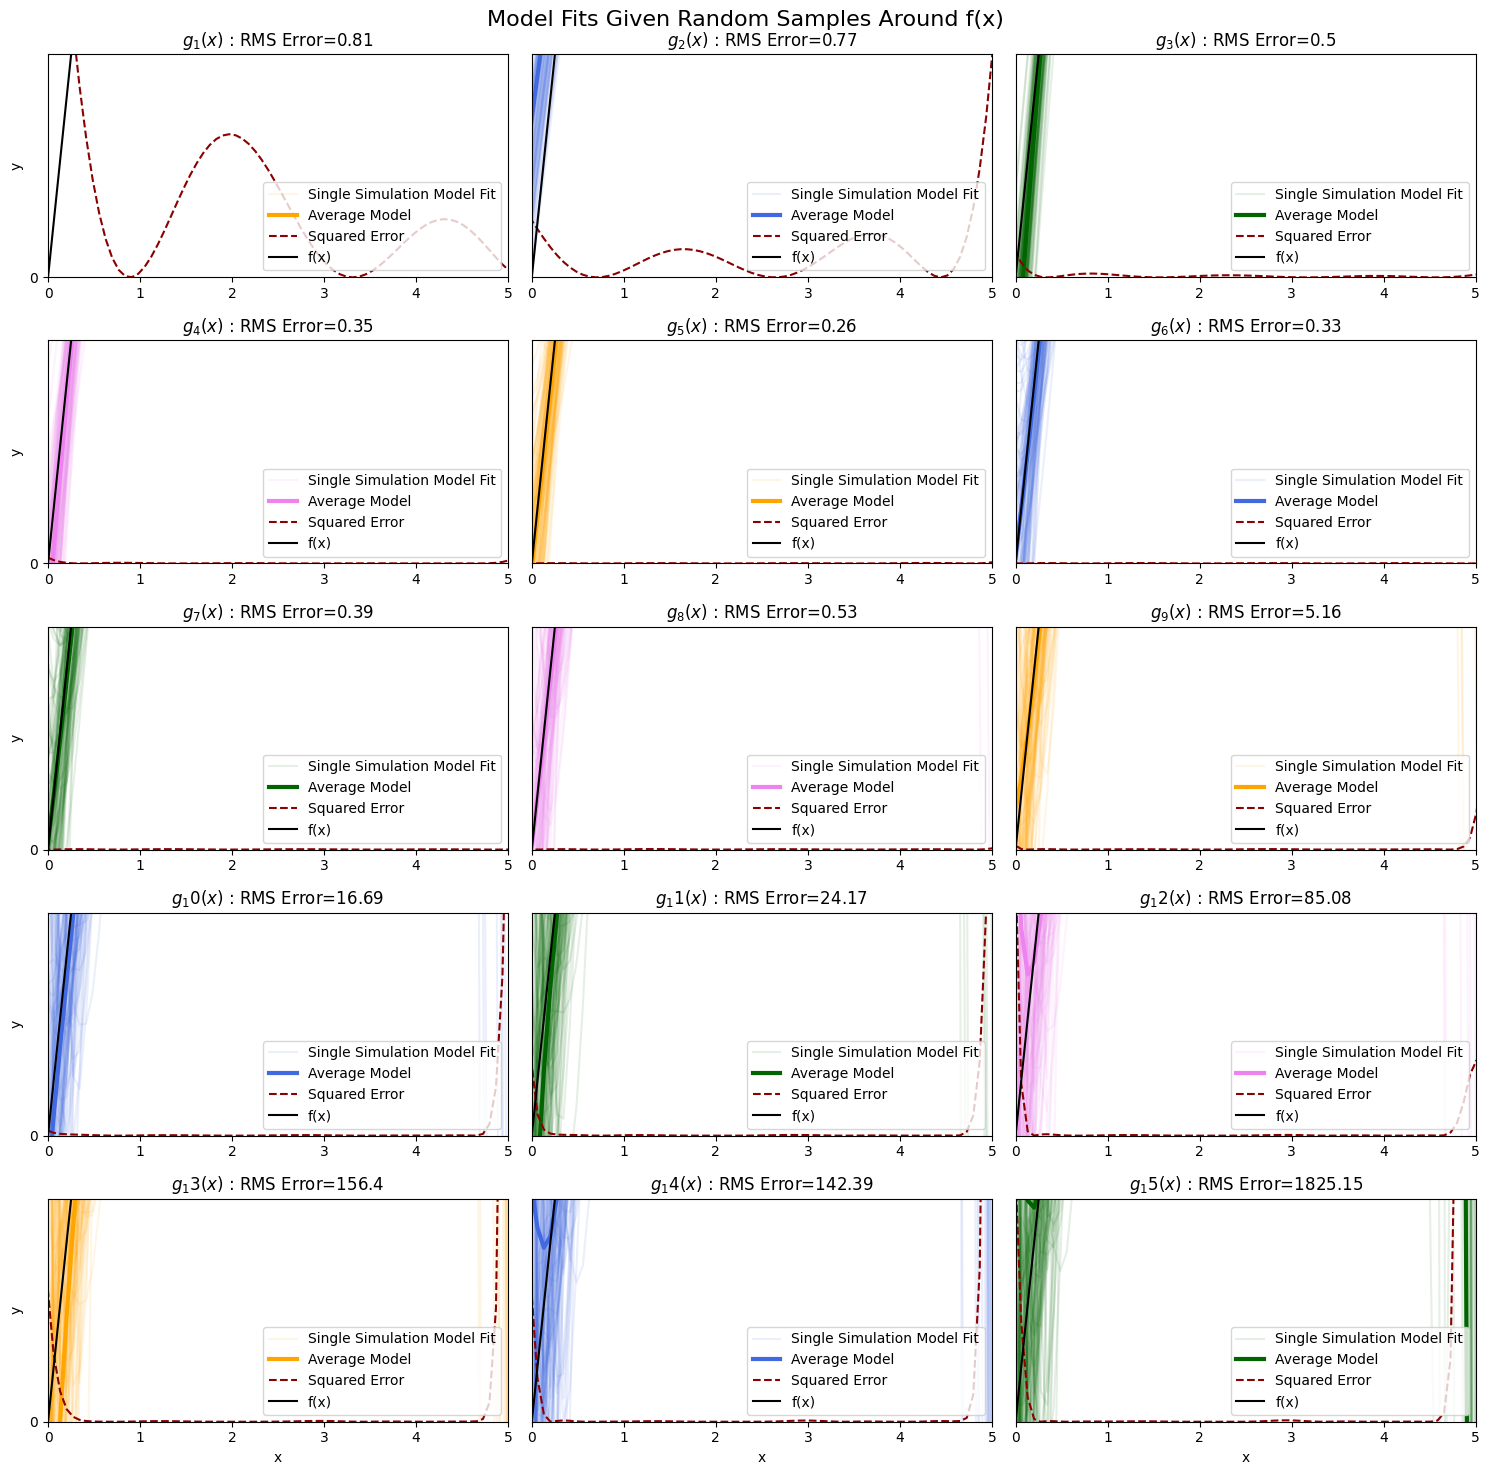

In [86]:
from collections import defaultdict
n_simulations = 100
N_OBSERVATIONS = 50
polynomial_degrees = [i for i in range(1,16)]

simulation_fits = defaultdict(list)

for sim in range(n_simulations): # Iterate over all of the simulations
  # Generate the 50 x values of the dataset
  x_values = np.random.rand(N_OBSERVATIONS) * 5

  # Generate the y values
  y_values = y(x_values)

  # iterate through the estimators
  for degree in polynomial_degrees:
    beta_tmp = np.polyfit(x_values, y_values, degree) # Estimate the polynomial parameters
    simulation_fits[degree].append(np.polyval(beta_tmp,x_grid)) # Make the polynomial line given the values

  # Now in the dictionary simulation_fits we have for each degree the values predicted for each polynomial


def error_function(pred, actual):
  return (pred - actual)**2

# Calculate the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(polynomial_degrees) + n_cols - 1) // n_cols # Calculate the number of rows needed


fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3)) # Adjust figure size based on the number of rows


for ii,degree in enumerate(polynomial_degrees):

  row_index = ii // n_cols
  col_index = ii % n_cols
  plt.sca(axs[row_index, col_index]) # Correctly index the 2D axs array


  for jj,fit in enumerate(simulation_fits[degree]):
    label = 'Single Simulation Model Fit' if jj == 0 else None
    plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii%len(POLYNOMIAL_FIT_COLORS)], alpha=.1, label=label) # Use modulo to cycle through colors

  average_fit = np.array(simulation_fits[degree]).mean(0)
  squared_error = error_function(average_fit, f(x_grid))
  rms = np.sqrt(np.mean(squared_error))
  plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii%len(POLYNOMIAL_FIT_COLORS)], linewidth=3, label='Average Model')
  plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
  plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
  plt.yticks([])

  if row_index == n_rows - 1: # Add x-label only to the bottom row
    plt.xlabel('x')
  if col_index == 0: # Add y-label only to the first column
    plt.ylabel('y')
    plt.yticks([-2, 0, 2])


  plt.xlim([0, 5])
  plt.ylim([0, .5])
  #plt.xticks([-1, 0, 1])
  plt.title(f"$g_{degree}(x)$ : RMS Error={np.round(rms, 2)}") # Corrected title
  plt.legend(loc='lower right')

# Hide any unused subplots
for ii in range(len(polynomial_degrees), n_rows * n_cols):
  row_index = ii // n_cols
  col_index = ii % n_cols
  fig.delaxes(axs[row_index, col_index])

plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTSIZE)

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

**Observations**
1. The model with the smallest RMS error is the one with degree 5

<>:87: SyntaxWarning: invalid escape sequence '\s'
<>:87: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2853501717.py:87: SyntaxWarning: invalid escape sequence '\s'
  plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^2$ = {round(NOISE_STD**2, 3)}')


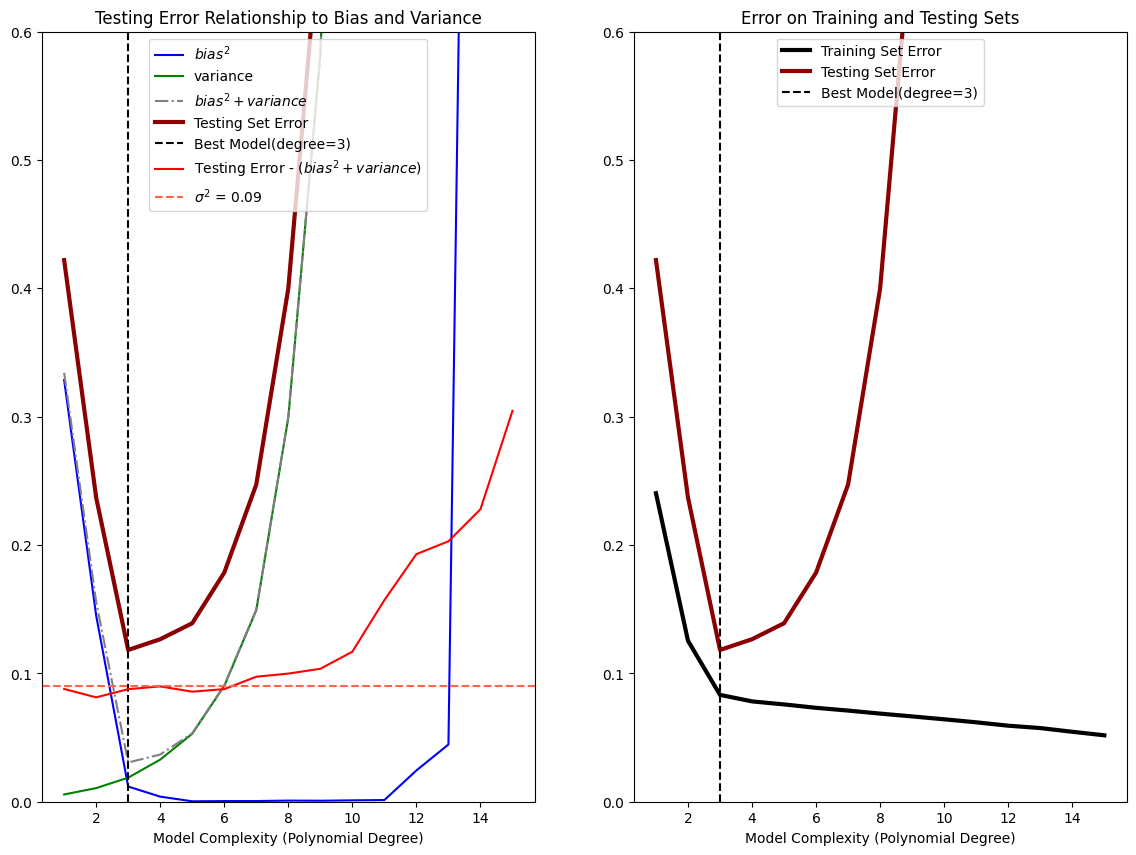

In [87]:
np.random.seed(124)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .3
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = np.linspace(0, 5, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
beta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_beta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_beta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_beta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))

def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)

def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)

complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^2$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')
plt.show()

# Part 3(b)

In [90]:
print(bias_squared[3])
print(variance[3])
print(complexity_test_error[3])


0.0039587099501408336
0.032808082478418474
0.1266258579644732


The model with the smallest error is when the degree is equal to 3. The value of the bias squared is 0.004 and therefore bias is 0.06 the variance is 0.03. The error on the test set is 0.13.
